In [1]:
%autosave 30
%pylab inline

%matplotlib inline
import numpy as np
from collections import deque
import functools
from os import listdir
from os.path import isfile, join

import os

from matplotlib import pyplot as plt
import pandas
import scipy
import numpy as np
import gc
import seaborn as sns
import pyproj
%autosave 30

%run -i data_loading_functions.py



Autosaving every 30 seconds
Populating the interactive namespace from numpy and matplotlib


Autosaving every 30 seconds
loaded all file header attributes into dict


In [2]:
meta = pandas.read_csv("../data/df_meta.csv", low_memory = True, skiprows = 0, compact_ints=True)
meta = meta.sort_values(['hcad']).fillna(0)
meta = meta.reset_index()
hcad = load_data("/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_point.hd", 
              normalize_columns=True)
wgs84=pyproj.Proj("+init=EPSG:4326") # LatLon with WGS84 datum used by GPS units and Google Earth
UTM26N=pyproj.Proj("+init=EPSG:2278") # UTM coords, zone Texas Central, WGS84 datum


/usr/local/lib/python2.7/dist-packages/pandas/io/parsers.py:759: FutureWarning: The 'compact_ints' argument has been deprecated and will be removed in a future version.


  self.options, self.engine = self._clean_options(options, engine)


loading...


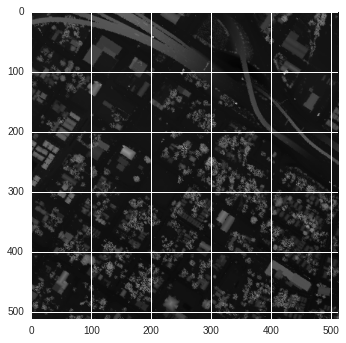

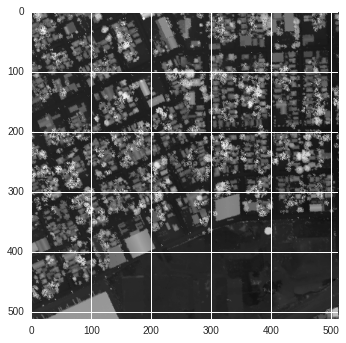

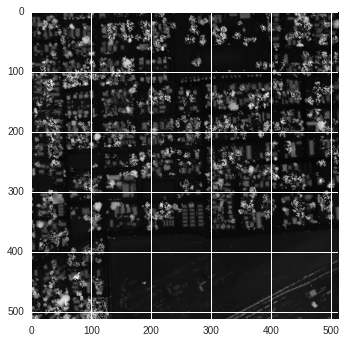

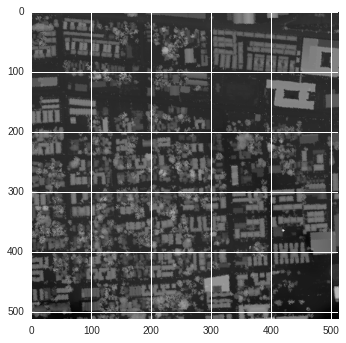

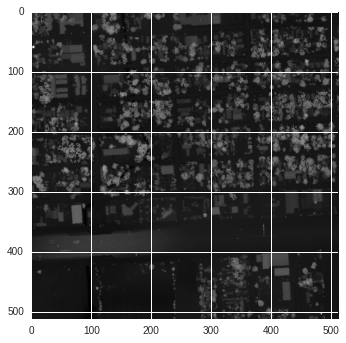

In [5]:

for index in [0, 100, 1000, 10000, 100000]:
    lon = [meta['lon'][index]]
    lat = [meta['lat'][index]]

    # convert fron lat/lon into coordinates used by GIS
    xx, yy = pyproj.transform(wgs84, UTM26N, lon, lat)
    housex=xx[0]
    housey=yy[0]
    lidar = None
    try:
        lidar = get_heightmap_around(housex, housey, window_width_pixels=512)
        lidar.size # to check that it is an array, not None
    except Exception as e:
        print e
        print "could not get lidar"
    lidar = lidar.copy()

    plt.imshow(1-lidar)
    plt.show()


